<a href="https://colab.research.google.com/github/mferiansyahrt/day_to_night_comparation/blob/main/deeplearning_method/Day2Night_Metrics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IMPORT MODULES

In [ ]:
from random import random
from numpy import load
from numpy import zeros
from numpy import ones
from numpy import asarray
from numpy.random import randint
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.initializers import RandomNormal
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Conv2DTranspose
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import MultiHeadAttention
from tensorflow.keras.layers import Concatenate, Flatten, Reshape, Lambda, Dense
from tensorflow.keras.layers import LayerNormalization, Add, BatchNormalization,GroupNormalization
from tensorflow.keras.activations import gelu
from tensorflow.keras.layers import Layer

from os import listdir
from numpy import vstack
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.callbacks import ModelCheckpoint
from matplotlib import pyplot as plt
from sklearn.utils import resample

from datetime import datetime
from tensorflow.keras.models import load_model
import tensorflow as tf
import cv2

from matplotlib import pyplot
import numpy as np
import shutil
from PIL import Image

# example of calculating the frechet inception distance in Keras
import numpy
from numpy import cov
from numpy import trace
from numpy import iscomplexobj
from numpy import asarray
from numpy.random import randint
from scipy.linalg import sqrtm
from keras.applications.inception_v3 import InceptionV3
from keras.applications.inception_v3 import preprocess_input
from keras.datasets.mnist import load_data
from skimage.transform import resize
from skimage.metrics import structural_similarity as ssim
from skimage import io, color

In [ ]:
# !git clone https://www.github.com/keras-team/keras-contrib.git

# #Download instance norm. code from the link above.
# #Or install keras_contrib using guidelines here: https://github.com/keras-team/keras-contrib
# #from instancenormalization import InstanceNormalization
# #pip install keras-contrib
# %cd keras-contrib
# from keras_contrib.layers.normalization.instancenormalization import InstanceNormalization

# CREATE DATASET

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
'''!mkdir /content/monet2photo/
%cd /content/monet2photo/
!unzip /content/gdrive/MyDrive/monet2photo.zip'''

'!mkdir /content/monet2photo/\n%cd /content/monet2photo/\n!unzip /content/gdrive/MyDrive/monet2photo.zip'

In [ ]:
!mkdir /content/day2night/
%cd /content/day2night/
#!unzip /content/gdrive/MyDrive/day2night_bdd_ip2.zip # Dataset campuran yang baru (train)
!unzip /content/gdrive/MyDrive/day2night_bdd_ip.zip # Dataset campuran yang lama (train)
#!unzip /content/gdrive/MyDrive/test_dataset.zip # Test dataset (80 image)
#!unzip /content/gdrive/MyDrive/day2night.zip # Dataset asli

/content/day2night
Archive:  /content/gdrive/MyDrive/day2night_bdd_ip.zip
   creating: trainDay/
  inflating: trainDay/6a729de1-7adc57f8.jpg  
  inflating: __MACOSX/trainDay/._6a729de1-7adc57f8.jpg  
  inflating: trainDay/Image_15.jpg   
  inflating: trainDay/Image_29.jpg   
  inflating: trainDay/1c1de1e7-346d6219.jpg  
  inflating: __MACOSX/trainDay/._1c1de1e7-346d6219.jpg  
  inflating: trainDay/6ad23488-70abed67.jpg  
  inflating: __MACOSX/trainDay/._6ad23488-70abed67.jpg  
  inflating: trainDay/6a626ee3-61100bbc.jpg  
  inflating: __MACOSX/trainDay/._6a626ee3-61100bbc.jpg  
  inflating: trainDay/0f145ef9-2fb016d0.jpg  
  inflating: __MACOSX/trainDay/._0f145ef9-2fb016d0.jpg  
  inflating: trainDay/00f7eac8-5193d600.jpg  
  inflating: __MACOSX/trainDay/._00f7eac8-5193d600.jpg  
  inflating: trainDay/Image_28.jpg   
  inflating: trainDay/Image_14.jpg   
  inflating: trainDay/1a2f2112-f566a272.jpg  
  inflating: __MACOSX/trainDay/._1a2f2112-f566a272.jpg  
  inflating: trainDay/0a0c3694

In [ ]:
!mkdir /content/skip_raw_clean/
%cd /content/skip_raw_clean/
#!unzip /content/gdrive/MyDrive/day2night_bdd_ip2.zip # Dataset campuran yang baru (train)
#!unzip /content/gdrive/MyDrive/day2night_bdd_ip.zip # Dataset campuran yang lama (train)
#!unzip /content/gdrive/MyDrive/test_dataset.zip # Test dataset (80 image)
#!unzip /content/gdrive/MyDrive/day2night.zip # Dataset asli
!unzip /content/gdrive/MyDrive/SKIP_RAW_CLEAN.zip

/content/skip_raw_clean
Archive:  /content/gdrive/MyDrive/SKIP_RAW_CLEAN.zip
   creating: SKIP_RAW_CLEAN/
   creating: SKIP_RAW_CLEAN/Image_11/
   creating: SKIP_RAW_CLEAN/Image_16/
   creating: SKIP_RAW_CLEAN/Image_29/
   creating: SKIP_RAW_CLEAN/Image_20/
  inflating: SKIP_RAW_CLEAN/.DS_Store  
  inflating: __MACOSX/SKIP_RAW_CLEAN/._.DS_Store  
   creating: SKIP_RAW_CLEAN/Image_27/
   creating: SKIP_RAW_CLEAN/Image_18/
   creating: SKIP_RAW_CLEAN/Image_42/
   creating: SKIP_RAW_CLEAN/Image_45/
   creating: SKIP_RAW_CLEAN/Image_26/
   creating: SKIP_RAW_CLEAN/Image_19/
   creating: SKIP_RAW_CLEAN/Image_21/
   creating: SKIP_RAW_CLEAN/Image_17/
   creating: SKIP_RAW_CLEAN/Image_28/
   creating: SKIP_RAW_CLEAN/Image_10/
   creating: SKIP_RAW_CLEAN/Image_44/
   creating: SKIP_RAW_CLEAN/Image_43/
   creating: SKIP_RAW_CLEAN/Image_50/
   creating: SKIP_RAW_CLEAN/Image_5/
   creating: SKIP_RAW_CLEAN/Image_57/
   creating: SKIP_RAW_CLEAN/Image_2/
   creating: SKIP_RAW_CLEAN/Image_68/
   crea

In [ ]:
'''# monet2photo

# load all images in a directory into memory
def load_images(path, size=(256,256)):
	data_list = list()
	# enumerate filenames in directory, assume all are images
	for filename in listdir(path):
		# load and resize the image
		pixels = load_img(path + filename, target_size=size)
		# convert to numpy array
		pixels = img_to_array(pixels)
		# store
		data_list.append(pixels)
	return asarray(data_list)

# dataset path
path = '/content/monet2photo/archive/'

# load dataset A - Monet paintings
dataA_all = load_images(path + 'trainA/')
print('Loaded dataA: ', dataA_all.shape)

#To get a subset of all images, for faster training during demonstration
dataA = resample(dataA_all,
                 replace=False,
                 n_samples=500,
                 random_state=42)
print(f'Use Monet paintings (dataA) with total of {dataA.shape[0]} images for training')

# load dataset B - Photos
dataB_all = load_images(path + 'trainB/')
print('Loaded dataB: ', dataB_all.shape)
#Get a subset of all images, for faster training during demonstration
#We could have just read the list of files and only load a subset, better memory management.
dataB = resample(dataB_all,
                 replace=False,
                 n_samples=500,
                 random_state=42)
print(f'Use Photos (dataB) with total of {dataB.shape[0]} images for training')
'''

"# monet2photo\n\n# load all images in a directory into memory\ndef load_images(path, size=(256,256)):\n\tdata_list = list()\n\t# enumerate filenames in directory, assume all are images\n\tfor filename in listdir(path):\n\t\t# load and resize the image\n\t\tpixels = load_img(path + filename, target_size=size)\n\t\t# convert to numpy array\n\t\tpixels = img_to_array(pixels)\n\t\t# store\n\t\tdata_list.append(pixels)\n\treturn asarray(data_list)\n\n# dataset path\npath = '/content/monet2photo/archive/'\n\n# load dataset A - Monet paintings\ndataA_all = load_images(path + 'trainA/')\nprint('Loaded dataA: ', dataA_all.shape)\n\n#To get a subset of all images, for faster training during demonstration\ndataA = resample(dataA_all,\n                 replace=False,\n                 n_samples=500,\n                 random_state=42)\nprint(f'Use Monet paintings (dataA) with total of {dataA.shape[0]} images for training')\n\n# load dataset B - Photos\ndataB_all = load_images(path + 'trainB/')\npr

In [ ]:
import os

os.remove('/content/day2night/trainDay/.DS_Store')
os.remove('/content/day2night/trainNight/.DS_Store')
os.remove('/content/skip_raw_clean/SKIP_RAW_CLEAN/.DS_Store')

day = sorted(os.listdir('/content/day2night/trainDay/'))
night = sorted(os.listdir('/content/day2night/trainNight/'))

In [ ]:
len(day),len(night)

(169, 169)

In [ ]:
# bdd_day2night

# load all images in a directory into memory
def load_images(path, size=(256,256)):
	data_list = list()
	# enumerate filenames in directory, assume all are images
	for filename in listdir(path):
		# load and resize the image
		pixels = load_img(path + filename, target_size=size)
		# convert to numpy array
		pixels = img_to_array(pixels)
		# store
		data_list.append(pixels)
	return asarray(data_list)

# dataset path
path = '/content/day2night/'

# load dataset A - day
dataA_all = load_images(path + 'trainDay/')
print('Loaded dataA: ', dataA_all.shape)

#To get a subset of all images, for faster training during demonstration
dataA = resample(dataA_all,
                 replace=False,
                 n_samples=len(day),
                 random_state=42)
print(f'Use Day Images (dataA) with total of {dataA.shape[0]} images for training')

# load dataset B - night
dataB_all = load_images(path + 'trainNight/')
print('Loaded dataB: ', dataB_all.shape)
#Get a subset of all images, for faster training during demonstration
#We could have just read the list of files and only load a subset, better memory management.
dataB = resample(dataB_all,
                 replace=False,
                 n_samples=len(night),
                 random_state=42)
print(f'Use Night Images (dataB) with total of {dataB.shape[0]} images for training')


Loaded dataA:  (169, 256, 256, 3)
Use Day Images (dataA) with total of 169 images for training
Loaded dataB:  (169, 256, 256, 3)
Use Night Images (dataB) with total of 169 images for training


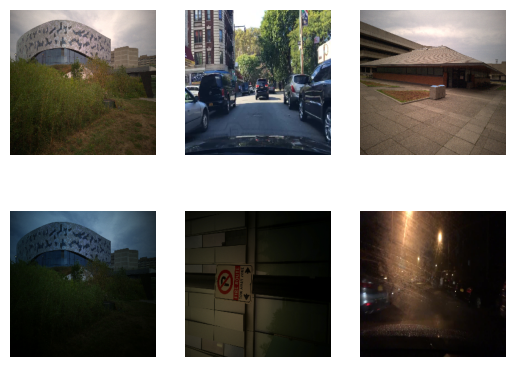

Loaded (169, 256, 256, 3) (169, 256, 256, 3)


In [ ]:
# plot source images
n_samples = 3
for i in range(n_samples):
	plt.subplot(2, n_samples, 1 + i)
	plt.axis('off')
	plt.imshow(dataA[i].astype('uint8'))
# plot target image
for i in range(n_samples):
	plt.subplot(2, n_samples, 1 + n_samples + i)
	plt.axis('off')
	plt.imshow(dataB[i].astype('uint8'))
plt.show()

# load image data
data = [dataA, dataB]

print('Loaded', data[0].shape, data[1].shape)

#Preprocess data to change input range to values between -1 and 1
# This is because the generator uses tanh activation in the output layer
#And tanh ranges between -1 and 1
def preprocess_data(data):
	# load compressed arrays
	# unpack arrays
	X1, X2 = data[0], data[1]
	# scale from [0,255] to [-1,1]
	X1 = (X1 - 127.5) / 127.5
	X2 = (X2 - 127.5) / 127.5
	return [X1, X2]

def preprocess_data_input_edge(data):
	# load compressed arrays
	# unpack arrays
	X1, X2 = data[0], data[1]
	# scale from [0,255] to [0,1]
	X1 = (X1) / 255.0
	X2 = (X2) / 255.0
	return [X1, X2]

dataset = preprocess_data(data)

# GENERATE NIGHT IMAGES

In [ ]:
#U-Net ViT Generator

def basic_block(layer,numfilter,alpha_lrelu):
  l = GroupNormalization(groups = -1, axis = -1)(layer)
  l = Conv2D(numfilter,(3,3), strides = 1, padding = 'same')(l)
  l = LeakyReLU(alpha = alpha_lrelu)(l)
  return l

def down_sampling(layer,numfilter,layer_name):
  l = Conv2D(numfilter, (2,2), strides = 2, padding = 'same', name = layer_name)(layer)
  return l

def up_sampling(layer, numfilter,layer_name):
  l = Conv2DTranspose(numfilter, (3,3), strides = 2, padding = 'same', name = layer_name)(layer)
  return l

def positional_embedding(seq_length,dim):
  sequence_length = seq_length
  dimension = dim

  position = tf.range(0,sequence_length,1)[:,np.newaxis]
  position = tf.cast(position,tf.float32)

  even_pos = tf.cast(tf.range(0,dimension,2),tf.float32)
  odd_pos = tf.cast(tf.range(1,dimension,2),tf.float32)
  even_denominator = tf.pow(1000.0,(even_pos/tf.cast(dimension,tf.float32)))
  odd_denominator = tf.pow(1000.0,((odd_pos-1)/tf.cast(dimension,tf.float32)))
  denominator = even_denominator # actually even_denominator == odd_denominator

  even_PE = tf.math.sin(position/denominator)
  odd_PE = tf.math.cos(position/denominator)

  stacked = tf.stack([even_PE,odd_PE],axis = -1)

  PE = tf.reshape(stacked,[sequence_length,dimension])

  return PE

# BASIC BLOCK SEBELUM DOWN ATAU SESUDAH UP SAMPLING MASIH BISA DITAMBAH SATU JIKA MENGIKUTI PAPER (SUDAH DITAMBAHKAN)
def unet_vit_generator(image_shape,num_features,n_attention_head,transformer_block,alpha_reg,alpha_lrelu):
  in_image = Input(shape = image_shape)

  # ---- preprocess ----
  x = Conv2D(64, (2,2), padding ='same', name = 'preprocess')(in_image)
  x = LeakyReLU(alpha = alpha_lrelu)(x)

  # ---- ENCODER PART ----
  #first block
  x = basic_block(x, num_features, alpha_lrelu)
  x_d1 = basic_block(x, num_features, alpha_lrelu)
  x = down_sampling(x_d1, num_features, 'down_1')

  #second block
  x = basic_block(x, num_features*2, alpha_lrelu)
  x_d2 = basic_block(x,num_features*2, alpha_lrelu)
  x = down_sampling(x_d2,num_features*2,'down_2')

  #third block
  x = basic_block(x, num_features*4, alpha_lrelu)
  x_d3 = basic_block(x,num_features*4, alpha_lrelu)
  x = down_sampling(x_d3,num_features*4,'down_3')

  #fourth block
  x = basic_block(x, num_features*8, alpha_lrelu)
  x_d4 = basic_block(x, num_features*8, alpha_lrelu)
  x = down_sampling(x_d4, num_features*8, 'down_4')
  flatten_shape = x.shape

  # ---- pixel-wise ViT ----
  x = Reshape((flatten_shape[1]*flatten_shape[2],flatten_shape[3]))(x)

  # Define Positional Encoding layer (256,512) by default
  PE = positional_embedding(flatten_shape[1]*flatten_shape[2],num_features*8) #Should be normalized later according to LeakyReLU range
  PE = LeakyReLU(alpha = alpha_lrelu)(PE)
  PE_layer = tf.expand_dims(PE, axis=0)
  PE_layer = tf.repeat(PE_layer, tf.shape(x)[0], axis=0)

  x = Concatenate(axis = 2)([x,PE_layer])
  x = Dense(num_features*8)(x)

  # Transformer Encoder Block
  for n in range(transformer_block):
    x_l = LayerNormalization(epsilon = 1e-6)(x)
    x = MultiHeadAttention(num_heads = n_attention_head, key_dim = num_features, dropout = 0.1)(x_l,x_l)
    # Rezero regularization Output = SkipConnection + α⋅MainPath
    x = tf.constant(alpha_reg) * x
    x = Add()([x_l,x])
    x_l2 = LayerNormalization(epsilon = 1e-6)(x)

    # FFN
    x = Dense(4*num_features*8, activation = 'gelu')(x_l2) # masih salah (seharusnya (512,2048))
    x = Dense(num_features*8)(x)                           # masih salah(seharusnya (2048,512))
    # Rezero regularization Output = SkipConnection + α⋅MainPath
    x = tf.constant(alpha_reg) * x
    x = Add()([x_l2,x])

  x = Dense(num_features*8)(x)
  x = Reshape((flatten_shape[1],flatten_shape[2],flatten_shape[3]))(x)

  # ---- DECODER PART ----
  #first block
  x = up_sampling(x,num_features*8,'up_1')
  x = Concatenate()([x, x_d4])
  x = basic_block(x,num_features*8, alpha_lrelu)
  x = basic_block(x,num_features*8, alpha_lrelu)

  #second block
  x = up_sampling(x,num_features*4,'up_2')
  x = Concatenate()([x, x_d3])
  x = basic_block(x,num_features*4, alpha_lrelu)
  x = basic_block(x,num_features*4, alpha_lrelu)

  #third block
  x = up_sampling(x,num_features*2,'up_3')
  x = Concatenate()([x, x_d2])
  x = basic_block(x,num_features*2, alpha_lrelu)
  x = basic_block(x,num_features*2, alpha_lrelu)

  #fourth block
  x = up_sampling(x,num_features,'up_4')
  x = Concatenate()([x, x_d1])
  x = basic_block(x,num_features, alpha_lrelu)
  x = basic_block(x,num_features, alpha_lrelu)

  # ---- postprocess ----
  x = Conv2D(3, (1,1), padding='same')(x)
  x = GroupNormalization(groups = -1, axis=-1)(x)
  out_image = Activation('tanh')(x)

  m = Model(in_image,out_image)
  return m

In [ ]:
def unet_vit_generator2(image_shape,num_features,n_attention_head,transformer_block,alpha_reg,alpha_lrelu):
  in_image = Input(shape = image_shape)

  # ---- preprocess ----
  x = Conv2D(64, (2,2), padding ='same', name = 'preprocess')(in_image)
  x = LeakyReLU(alpha = alpha_lrelu)(x)

  # ---- ENCODER PART ----
  #first block
  x = basic_block(x, num_features, alpha_lrelu)
  x_d1 = basic_block(x, num_features, alpha_lrelu)
  x = down_sampling(x_d1, num_features, 'down_1')

  #second block
  x = basic_block(x, num_features*2, alpha_lrelu)
  x_d2 = basic_block(x,num_features*2, alpha_lrelu)
  x = down_sampling(x_d2,num_features*2,'down_2')

  #third block
  x = basic_block(x, num_features*4, alpha_lrelu)
  x_d3 = basic_block(x,num_features*4, alpha_lrelu)
  x = down_sampling(x_d3,num_features*4,'down_3')

  #fourth block
  x = basic_block(x, num_features*8, alpha_lrelu)
  x_d4 = basic_block(x, num_features*8, alpha_lrelu)
  x = down_sampling(x_d4, num_features*8, 'down_4')
  flatten_shape = x.shape

  # ---- pixel-wise ViT ----
  x = Reshape((flatten_shape[1]*flatten_shape[2],flatten_shape[3]))(x)

  # Define Positional Encoding layer (256,512) by default
  PE = positional_embedding(flatten_shape[1]*flatten_shape[2],num_features*8) #Should be normalized later according to LeakyReLU range
  PE = LeakyReLU(alpha = alpha_lrelu)(PE)
  PE_layer = tf.expand_dims(PE, axis=0)

  class RepeatLayer(Layer):
      def __init__(self, axis=0, **kwargs):
          super(RepeatLayer, self).__init__(**kwargs)
          self.axis = axis

      def call(self, inputs, x):
          repeat_times = tf.shape(x)[0]  # Get the batch size dynamically from 'x'
          return tf.repeat(inputs, repeat_times, axis=self.axis)

      def get_config(self):
          config = super().get_config().copy()
          config.update({
              'axis': self.axis
          })
          return config

  # Custom repeat layer instead of tf.repeat
  PE_layer = RepeatLayer(axis=0)(PE_layer, x)

  # Concatenate positional encoding with input
  x = Concatenate(axis=2)([x, PE_layer])
  x = Dense(num_features * 8)(x)


  # Transformer Encoder Block
  for n in range(transformer_block):
    x_l = LayerNormalization(epsilon = 1e-6)(x)
    x = MultiHeadAttention(num_heads = n_attention_head, key_dim = num_features, dropout = 0.1)(x_l,x_l)
    # Rezero regularization Output = SkipConnection + α⋅MainPath
    x = tf.constant(alpha_reg) * x
    x = Add()([x_l,x])
    x_l2 = LayerNormalization(epsilon = 1e-6)(x)

    # FFN
    x = Dense(4*num_features*8, activation = 'gelu')(x_l2) # masih salah (seharusnya (512,2048))
    x = Dense(num_features*8)(x)                           # masih salah(seharusnya (2048,512))
    # Rezero regularization Output = SkipConnection + α⋅MainPath
    x = tf.constant(alpha_reg) * x
    x = Add()([x_l2,x])

  x = Dense(num_features*8)(x)
  x = Reshape((flatten_shape[1],flatten_shape[2],flatten_shape[3]))(x)

  # ---- DECODER PART ----
  #first block
  x = up_sampling(x,num_features*8,'up_1')
  x = Concatenate()([x, x_d4])
  x = basic_block(x,num_features*8, alpha_lrelu)
  x = basic_block(x,num_features*8, alpha_lrelu)

  #second block
  x = up_sampling(x,num_features*4,'up_2')
  x = Concatenate()([x, x_d3])
  x = basic_block(x,num_features*4, alpha_lrelu)
  x = basic_block(x,num_features*4, alpha_lrelu)

  #third block
  x = up_sampling(x,num_features*2,'up_3')
  x = Concatenate()([x, x_d2])
  x = basic_block(x,num_features*2, alpha_lrelu)
  x = basic_block(x,num_features*2, alpha_lrelu)

  #fourth block
  x = up_sampling(x,num_features,'up_4')
  x = Concatenate()([x, x_d1])
  x = basic_block(x,num_features, alpha_lrelu)
  x = basic_block(x,num_features, alpha_lrelu)

  # ---- postprocess ----
  x = Conv2D(3, (1,1), padding='same')(x)
  x = GroupNormalization(groups = -1, axis=-1)(x)
  out_image = Activation('tanh')(x)

  m = Model(in_image,out_image)
  return m

In [ ]:
#U-Net ViT edge loss Generator

# BASIC BLOCK SEBELUM DOWN ATAU SESUDAH UP SAMPLING MASIH BISA DITAMBAH SATU JIKA MENGIKUTI PAPER (SUDAH DITAMBAHKAN)
def unet_vit_edgeloss_generator(image_shape,num_features,n_attention_head,transformer_block,alpha_reg,alpha_lrelu):
  in_image = Input(shape = image_shape)

  # ---- preprocess ----
  x = Conv2D(64, (2,2), padding ='same', name = 'preprocess')(in_image)
  x = LeakyReLU(alpha = alpha_lrelu)(x)

  # ---- ENCODER PART ----
  #first block
  x = basic_block(x, num_features, alpha_lrelu)
  x_d1 = basic_block(x, num_features, alpha_lrelu)
  x = down_sampling(x_d1, num_features, 'down_1')

  #second block
  x = basic_block(x, num_features*2, alpha_lrelu)
  x_d2 = basic_block(x,num_features*2, alpha_lrelu)
  x = down_sampling(x_d2,num_features*2,'down_2')

  #third block
  x = basic_block(x, num_features*4, alpha_lrelu)
  x_d3 = basic_block(x,num_features*4, alpha_lrelu)
  x = down_sampling(x_d3,num_features*4,'down_3')

  #fourth block
  x = basic_block(x, num_features*8, alpha_lrelu)
  x_d4 = basic_block(x, num_features*8, alpha_lrelu)
  x = down_sampling(x_d4, num_features*8, 'down_4')
  flatten_shape = x.shape

  # ---- pixel-wise ViT ----
  x = Reshape((flatten_shape[1]*flatten_shape[2],flatten_shape[3]))(x)

  # Define Positional Encoding layer (256,512) by default
  PE = positional_embedding(flatten_shape[1]*flatten_shape[2],num_features*8) #Should be normalized later according to LeakyReLU range
  PE = LeakyReLU(alpha = alpha_lrelu)(PE)
  PE_layer = tf.expand_dims(PE, axis=0)

  class RepeatLayer(Layer):
      def __init__(self, axis=0, **kwargs):
          super(RepeatLayer, self).__init__(**kwargs)
          self.axis = axis

      def call(self, inputs, x):
          repeat_times = tf.shape(x)[0]  # Get the batch size dynamically from 'x'
          return tf.repeat(inputs, repeat_times, axis=self.axis)

      def get_config(self):
          config = super().get_config().copy()
          config.update({
              'axis': self.axis
          })
          return config

  # Custom repeat layer instead of tf.repeat
  PE_layer = RepeatLayer(axis=0)(PE_layer, x)

  # Concatenate positional encoding with input
  x = Concatenate(axis=2)([x, PE_layer])
  x = Dense(num_features * 8)(x)

  # Transformer Encoder Block
  for n in range(transformer_block):
    x_l = LayerNormalization(epsilon = 1e-6)(x)
    x = MultiHeadAttention(num_heads = n_attention_head, key_dim = num_features, dropout = 0.1)(x_l,x_l)
    # Rezero regularization Output = SkipConnection + α⋅MainPath
    x = tf.constant(alpha_reg) * x
    x = Add()([x_l,x])
    x_l2 = LayerNormalization(epsilon = 1e-6)(x)

    # FFN
    x = Dense(4*num_features*8, activation = 'gelu')(x_l2) # masih salah (seharusnya (512,2048))
    x = Dense(num_features*8)(x)                           # masih salah(seharusnya (2048,512))
    # Rezero regularization Output = SkipConnection + α⋅MainPath
    x = tf.constant(alpha_reg) * x
    x = Add()([x_l2,x])

  x = Dense(num_features*8)(x)
  x = Reshape((flatten_shape[1],flatten_shape[2],flatten_shape[3]))(x)

  # ---- DECODER PART ----
  #first block
  x = up_sampling(x,num_features*8,'up_1')
  x = Concatenate()([x, x_d4])
  x = basic_block(x,num_features*8, alpha_lrelu)
  x = basic_block(x,num_features*8, alpha_lrelu)

  #second block
  x = up_sampling(x,num_features*4,'up_2')
  x = Concatenate()([x, x_d3])
  x = basic_block(x,num_features*4, alpha_lrelu)
  x = basic_block(x,num_features*4, alpha_lrelu)

  #third block
  x = up_sampling(x,num_features*2,'up_3')
  x = Concatenate()([x, x_d2])
  x = basic_block(x,num_features*2, alpha_lrelu)
  x = basic_block(x,num_features*2, alpha_lrelu)

  #fourth block
  x = up_sampling(x,num_features,'up_4')
  x = Concatenate()([x, x_d1])
  x = basic_block(x,num_features, alpha_lrelu)
  x = basic_block(x,num_features, alpha_lrelu)

  # ---- postprocess ----
  x = Conv2D(3, (1,1), padding='same')(x)
  x = GroupNormalization(groups = -1, axis=-1)(x)
  out_image = Activation('tanh')(x)

  m = Model(in_image,out_image)
  return m

In [ ]:
# generator a resnet block to be used in the generator
# residual block that contains two 3 × 3 convolutional layers with the same number of filters on both layers.
def resnet_block(n_filters, input_layer):
	# weight initialization
	init = RandomNormal(stddev=0.02)
	# first convolutional layer
	g = Conv2D(n_filters, (3,3), padding='same', kernel_initializer=init)(input_layer)
	g = GroupNormalization(groups = -1, axis=-1)(g)
	g = Activation('relu')(g)
	# second convolutional layer
	g = Conv2D(n_filters, (3,3), padding='same', kernel_initializer=init)(g)
	g = GroupNormalization(groups = -1, axis=-1)(g)
	# concatenate merge channel-wise with input layer
	g = Concatenate()([g, input_layer])
	return g

def define_generator_fpn(image_shape, n_resnet=9):
	# weight initialization
	init = RandomNormal(stddev=0.02)
	# image input
	in_image = Input(shape=image_shape)
	# c7s1-64
	g = Conv2D(64, (7,7), padding='same', kernel_initializer=init)(in_image)
	g = GroupNormalization(groups = -1, axis=-1)(g)
	g = Activation('relu')(g)
	# d128
	g = Conv2D(128, (3,3), strides=(2,2), padding='same', kernel_initializer=init)(g)
	g = GroupNormalization(groups = -1, axis=-1)(g)
	g = Activation('relu')(g)
	# d256
	g = Conv2D(256, (3,3), strides=(2,2), padding='same', kernel_initializer=init)(g)
	g = GroupNormalization(groups = -1, axis=-1)(g)
	g = Activation('relu')(g)
	# R256
	for _ in range(n_resnet):
		g = resnet_block(256, g)

	#FPN
	#------------
	p0p = Conv2D(256, (1,1), strides = (1,1), padding = 'same', kernel_initializer = init,
							activation = 'relu', name = 'Conv2d_p0')(g)

	p1 = Conv2D(512, (3,3), strides = (2,2), padding = 'same', kernel_initializer = init)(g)
	p1 = BatchNormalization(axis = -1)(p1)
	p1 = Activation('relu',name = 'CBR-1')(p1)
	p1p = Conv2D(256, (1,1), strides = (1,1), padding = 'same', kernel_initializer = init,
							activation = 'relu', name = 'conv2d_p1')(p1)

	p2 = Conv2D(1024, (3,3), strides = (2,2), padding = 'same', kernel_initializer = init)(p1)
	p2 = BatchNormalization(axis = -1)(p2)
	p2 = Activation('relu', name = 'CBR-2')(p2)
	p2p = Conv2D(256, (1,1), strides = (1,1), padding = 'same', kernel_initializer = init,
							activation = 'relu', name = 'conv2d_p2')(p2)

	inp1 = Conv2DTranspose(256, (3,3), strides = (2,2), padding = 'same', kernel_initializer = init,
													activation = 'relu', name = 'Interpolate-1')(p2p)

	p1p_inp1 = Add(name = 'Add_p1')([p1p,inp1])

	# Ukuran filter disini bisa 3 x 3 atau 1 x 1 untuk menjaga filter hasil konvolusi tidak berubah
	p3 = Conv2D(256, (3,3), strides = (1,1), padding = 'same', kernel_initializer = init)(p1p_inp1)
	p3 = BatchNormalization(axis = -1)(p3)
	p3 = Activation('relu', name = 'CBR-3')(p3)

	inp2 = Conv2DTranspose(256, (3,3), strides = (2,2), padding = 'same', kernel_initializer = init,
													activation = 'relu', name = 'Interpolate-2')(p3)

	p0p_inp2 = Add(name = 'Add_p0')([p0p,inp2])

	# Ukuran filter disini bisa 3 x 3 atau 1 x 1 untuk menjaga filter hasil konvolusi tidak berubah
	p4 = Conv2D(256, (3,3), strides = (1,1), padding = 'same', kernel_initializer = init)(p0p_inp2)
	p4 = BatchNormalization(axis = -1)(p4)
	p4 = Activation('relu', name = 'CBR-4')(p4)
	#------------

	# u128
	g = Conv2DTranspose(128, (3,3), strides=(2,2), padding='same', kernel_initializer=init)(p4)
	g = GroupNormalization(groups = -1, axis=-1)(g)
	g = Activation('relu')(g)
	# u64
	g = Conv2DTranspose(64, (3,3), strides=(2,2), padding='same', kernel_initializer=init)(g)
	g = GroupNormalization(groups = -1, axis=-1)(g)
	g = Activation('relu')(g)
	# c7s1-3
	g = Conv2D(3, (7,7), padding='same', kernel_initializer=init)(g)
	g = GroupNormalization(groups = -1, axis=-1)(g)
	out_image = Activation('tanh')(g)
	# define model
	model = Model(in_image, out_image)
	return model

In [ ]:
def define_generator(image_shape, n_resnet=9):
	# weight initialization
	init = RandomNormal(stddev=0.02)
	# image input
	in_image = Input(shape=image_shape)
	# c7s1-64
	g = Conv2D(64, (7,7), padding='same', kernel_initializer=init)(in_image)
	g = GroupNormalization(groups = -1, axis=-1)(g)
	g = Activation('relu')(g)
	# d128
	g = Conv2D(128, (3,3), strides=(2,2), padding='same', kernel_initializer=init)(g)
	g = GroupNormalization(groups = -1, axis=-1)(g)
	g = Activation('relu')(g)
	# d256
	g = Conv2D(256, (3,3), strides=(2,2), padding='same', kernel_initializer=init)(g)
	g = GroupNormalization(groups = -1, axis=-1)(g)
	g = Activation('relu')(g)
	# R256
	for _ in range(n_resnet):
		g = resnet_block(256, g)
	# u128
	g = Conv2DTranspose(128, (3,3), strides=(2,2), padding='same', kernel_initializer=init)(g)
	g = GroupNormalization(groups = -1, axis=-1)(g)
	g = Activation('relu')(g)
	# u64
	g = Conv2DTranspose(64, (3,3), strides=(2,2), padding='same', kernel_initializer=init)(g)
	g = GroupNormalization(groups = -1, axis=-1)(g)
	g = Activation('relu')(g)
	# c7s1-3
	g = Conv2D(3, (7,7), padding='same', kernel_initializer=init)(g)
	g = GroupNormalization(groups = -1, axis=-1)(g)
	out_image = Activation('tanh')(g)
	# define model
	model = Model(in_image, out_image)
	return model

In [ ]:
# UVCGAN

weight_path_d2n = '/content/gdrive/MyDrive/weight_only/g_model_AtoB_016224.h5'
#weight_path_n2d = '/content/gdrive/MyDrive/weight_only/g_model_BtoA_016224.h5'

image_shape = dataset[0].shape[1:]
n_features = 128 #64
n_attention_head = 12 #10
transformer_block = 12 #12
alpha_reg = 0.00001
alpha_lrelu = 0.01

#generator = unet_vit_generator(image_shape,n_features,n_attention_head,transformer_block,alpha_reg,alpha_lrelu)
# generator: A -> B
model_d2n_uvcgan = unet_vit_generator2(image_shape,n_features,n_attention_head,transformer_block,alpha_reg,alpha_lrelu)
# generator: B -> A
#model_n2d = unet_vit_generator(image_shape,n_features,n_attention_head,transformer_block,alpha_reg,alpha_lrelu)

model_d2n_uvcgan.load_weights(weight_path_d2n)
#model_n2d.load_weights(weight_path_n2d)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


In [ ]:
# FPN-CYCLEGAN

weight_path_d2n = '/content/gdrive/MyDrive/weight_only_FPNCycleGAN/g_model_AtoB_015210.h5'
#weight_path_n2d = '/content/gdrive/MyDrive/weight_only_FPNCycleGAN/g_model_BtoA_015210.h5'

# define input shape based on the loaded dataset
image_shape = dataset[0].shape[1:]
# generator: A -> B
model_d2n_fpncgan = define_generator_fpn(image_shape)
# generator: B -> A
#model_n2d = define_generator_fpn(image_shape)

model_d2n_fpncgan.load_weights(weight_path_d2n)

In [ ]:
# VANILLA CYCLE GAN

weight_path_d2n = '/content/gdrive/MyDrive/weight_only_VanillaCycleGAN/g_model_AtoB_016055.h5'
#weight_path_n2d = '/content/gdrive/MyDrive/weight_only_VanillaCycleGAN/g_model_BtoA_016055.h5'

# define input shape based on the loaded dataset
image_shape = dataset[0].shape[1:]
# generator: A -> B
model_d2n_vcgan = define_generator(image_shape)
# generator: B -> A
#model_n2d = define_generator(image_shape)

model_d2n_vcgan.load_weights(weight_path_d2n)
#model_n2d.load_weights(weight_path_n2d)

In [ ]:
# UVCGAN with EDGE LOSS

#weight_path_d2n = '/content/gdrive/MyDrive/weight_only_UVCGAN_EdgeLoss_olddata_169im/g_model_BtoA_016055.h5'
weight_path_d2n = '/content/gdrive/MyDrive/train_CycleGAN100ep_UVCGAN_EdgeLoss_ResumeTraining/g_model_BtoA_033462.h5'
#weight_path_n2d = '/content/gdrive/MyDrive/weight_only_VanillaCycleGAN/g_model_BtoA_016055.h5'

# define input shape based on the loaded dataset
image_shape = dataset[0].shape[1:]
n_features = 128 #64
n_attention_head = 24 #10
transformer_block = 12 #12
alpha_reg = 0.00001
alpha_lrelu = 0.01

# generator: A -> B
model_d2n_uvcgan_edgeloss = unet_vit_edgeloss_generator(image_shape,n_features,n_attention_head,transformer_block,alpha_reg,alpha_lrelu)
# generator: B -> A
#model_n2d = define_generator(image_shape)

model_d2n_uvcgan_edgeloss.load_weights(weight_path_d2n)
#model_n2d.load_weights(weight_path_n2d)

In [ ]:
# plot B->A->B (Night to Day to Night)

day_dataset = dataset[0]

# predict uvcgan
dataset_night_generated_uvcgan  = model_d2n_uvcgan.predict(day_dataset)

# predict fpncyclegan
dataset_night_generated_fpncgan  = model_d2n_fpncgan.predict(day_dataset)

# predict vanillagan
dataset_night_generated_vcgan  = model_d2n_vcgan.predict(day_dataset)

# predict uvcgan with edge loss
dataset_night_generated_uvcgan_edgeloss  = model_d2n_uvcgan_edgeloss.predict(day_dataset)

6/6 ━━━━━━━━━━━━━━━━━━━━ 167s 12s/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 137s 9s/step


6/6 ━━━━━━━━━━━━━━━━━━━━ 29s 3s/step


6/6 ━━━━━━━━━━━━━━━━━━━━ 40s 6s/step


In [ ]:
# [-1,1] to [0,1]

day = (day_dataset + 1)/2.0

night_generated_uvcgan = (dataset_night_generated_uvcgan + 1)/2.0
night_generated_fpncgan = (dataset_night_generated_fpncgan + 1)/2.0
night_generated_vcgan = (dataset_night_generated_vcgan + 1)/2.0
night_generated_uvcgan_edgeloss = (dataset_night_generated_uvcgan_edgeloss + 1)/2.0

(-0.5, 255.5, 255.5, -0.5)

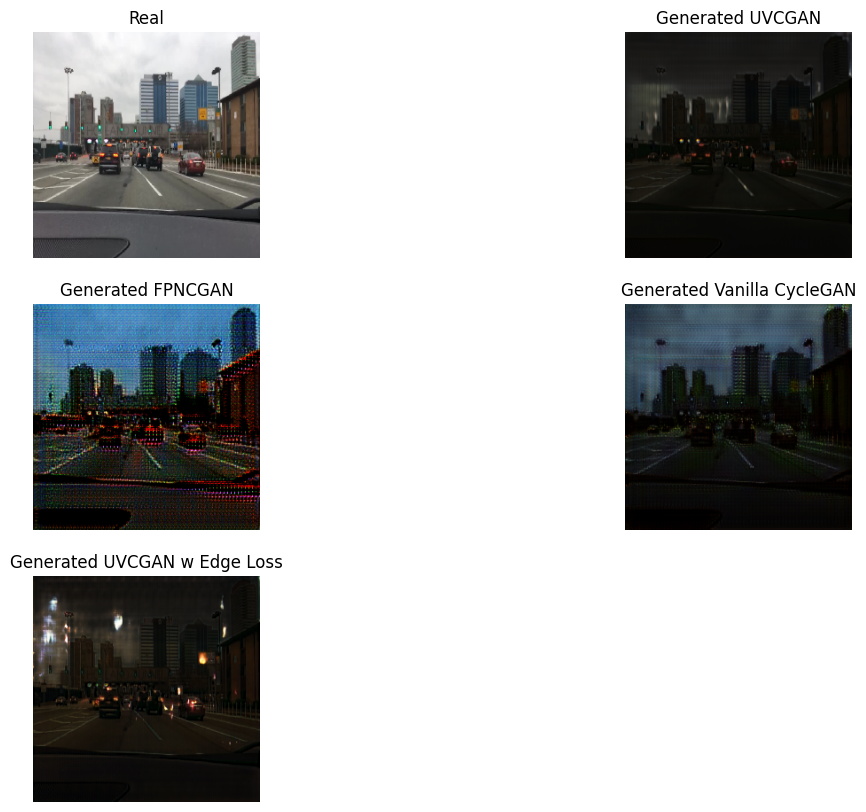

In [ ]:
sample = 19# sample 30 dan 44 yang bagus, dan 76 untuk Edge FEATURES

plt.figure(figsize = [14,10])

plt.subplot(3,2,1)
plt.imshow(day[sample])
plt.title('Real')
plt.axis('off')

plt.subplot(3,2,2)
plt.imshow(night_generated_uvcgan[sample])
plt.title('Generated UVCGAN')
plt.axis('off')

plt.subplot(3,2,3)
plt.imshow(night_generated_fpncgan[sample])
plt.title('Generated FPNCGAN')
plt.axis('off')

plt.subplot(3,2,4)
plt.imshow(night_generated_vcgan[sample])
plt.title('Generated Vanilla CycleGAN')
plt.axis('off')

plt.subplot(3,2,5)
plt.imshow(night_generated_uvcgan_edgeloss[sample])
plt.title('Generated UVCGAN w Edge Loss')
plt.axis('off')

In [ ]:
# Save generated image on

def create_path(day_im,night_im,new_path):
  path_gen = '/content/gdrive/MyDrive/' + new_path + '/'

  # Check if the directory exists
  if not os.path.exists(path_gen):
    os.mkdir(path_gen)
  else:
    print(f"Directory '{path_gen}' already exists.")

  path_gen_day = '/content/gdrive/MyDrive/' + new_path + '/day/'

  # Check if the directory exists
  if not os.path.exists(path_gen_day):
    os.mkdir(path_gen_day)
  else:
    print(f"Directory '{path_gen_day}' already exists.")

  path_gen_night = '/content/gdrive/MyDrive/' + new_path + '/night/'

  # Check if the directory exists
  if not os.path.exists(path_gen_night):
    os.mkdir(path_gen_night)
  else:
    print(f"Directory '{path_gen_night}' already exists.")

  # UNNORMALIZED IMAGE IS SAVED WITH THE RANGE OF [0,255]
  for i in range(len(day_im)):
    #day
    im_day = cv2.cvtColor(day_im[i]*255,cv2.COLOR_BGR2RGB)
    cv2.imwrite(path_gen_day + str(i) + '.jpg', im_day)

    #night
    im_night = cv2.cvtColor(night_im[i]*255,cv2.COLOR_BGR2RGB)
    cv2.imwrite(path_gen_night + str(i) + '.jpg', im_night)

create_path(day,night_generated_uvcgan,'night_generated_uvcgan')
create_path(day,night_generated_fpncgan,'night_generated_fpncgan')
create_path(day,night_generated_vcgan,'night_generated_vcgan')
create_path(day,night_generated_uvcgan_edgeloss,'night_generated_uvcgan_edgeloss')

Directory '/content/gdrive/MyDrive/night_generated_uvcgan/' already exists.
Directory '/content/gdrive/MyDrive/night_generated_uvcgan/day/' already exists.
Directory '/content/gdrive/MyDrive/night_generated_uvcgan/night/' already exists.


# FID

In [ ]:
# scale an array of images to a new size
def scale_images(images, new_shape):
  images_list = list()
  for image in images:
    # resize with nearest neighbor interpolation
    new_image = resize(image, new_shape, 0)
    # store
    images_list.append(new_image)
  return asarray(images_list)

# calculate frechet inception distance
def calculate_fid(model, images1, images2):
 # calculate activations
 act1 = model.predict(images1)
 act2 = model.predict(images2)
 # calculate mean and covariance statistics
 mu1, sigma1 = act1.mean(axis=0), cov(act1, rowvar=False)
 mu2, sigma2 = act2.mean(axis=0), cov(act2, rowvar=False)
 # calculate sum squared difference between means
 ssdiff = numpy.sum((mu1 - mu2)**2.0)
 # calculate sqrt of product between cov
 covmean = sqrtm(sigma1.dot(sigma2))
 # check and correct imaginary numbers from sqrt
 if iscomplexobj(covmean):
  covmean = covmean.real
 # calculate score
 fid = ssdiff + trace(sigma1) + trace(sigma2) - 2.0 * trace(covmean)
 return fid,act1,act2,sigma1,sigma2,covmean,ssdiff


In [ ]:
# prepare the inception v3 model
model = InceptionV3(include_top=False, pooling='avg', input_shape=(299,299,3), weights = 'imagenet', classifier_activation = None)
model.summary()

In [ ]:
# Input Image
day_unnorm = day * 255.0
day_unnorm_scaled = scale_images(day_unnorm, (299,299,3))
day_inception = preprocess_input(day_unnorm_scaled)

# Preprocess

# UVCGAN
night_generated_unnorm_uvcgan = night_generated_uvcgan * 255.0
night_generated_unnorm_scaled_uvcgan = scale_images(night_generated_unnorm_uvcgan, (299,299,3))
night_generated_inception_uvcgan = preprocess_input(night_generated_unnorm_scaled_uvcgan)

# FPNCGAN
night_generated_unnorm_fpncgan = night_generated_fpncgan * 255.0
night_generated_unnorm_scaled_fpncgan = scale_images(night_generated_unnorm_fpncgan, (299,299,3))
night_generated_inception_fpncgan = preprocess_input(night_generated_unnorm_scaled_fpncgan)

# VCGAN
night_generated_unnorm_vcgan = night_generated_vcgan * 255.0
night_generated_unnorm_scaled_vcgan = scale_images(night_generated_unnorm_vcgan, (299,299,3))
night_generated_inception_vcgan = preprocess_input(night_generated_unnorm_scaled_vcgan)

# UVCGAN with Edge Loss
night_generated_unnorm_uvcgan_edgeloss = night_generated_uvcgan_edgeloss * 255.0
night_generated_unnorm_scaled_uvcgan_edgeloss = scale_images(night_generated_unnorm_uvcgan_edgeloss, (299,299,3))
night_generated_inception_uvcgan_edgeloss = preprocess_input(night_generated_unnorm_scaled_uvcgan_edgeloss)

In [ ]:
# fid between images1 and images1
fid_s,act1_s,act2_s,sigma1_s,sigma2_s,covmean_s,ssdiff_s = calculate_fid(model, day_inception, day_inception)
print('FID (same): %.3f' % ssdiff_s)

# UVCGAN
fid_d_uvcgan,act1_d,act2_d,sigma1_d,sigma2_d,covmean_d,ssdiff_d_uvcgan = calculate_fid(model, day_inception, night_generated_inception_uvcgan)
print('FID (same) - UVCGAN: %.3f' % ssdiff_d_uvcgan)

# FPNCGAN
fid_d_fpncgan,act1_d,act2_d,sigma1_d,sigma2_d,covmean_d,ssdiff_d_fpncgan = calculate_fid(model, day_inception, night_generated_inception_fpncgan)
print('FID (same) - FPNCGAN: %.3f' % ssdiff_d_fpncgan)

# VCGAN
fid_d_vcgan,act1_d,act2_d,sigma1_d,sigma2_d,covmean_d,ssdiff_d_vcgan = calculate_fid(model, day_inception, night_generated_inception_vcgan)
print('FID (same) - VCGAN: %.3f' % ssdiff_d_vcgan)

# UVCGAN with Edge Loss
fid_d_uvcgan_edgeloss,act1_d,act2_d,sigma1_d,sigma2_d,covmean_d,ssdiff_d_uvcgan_edgeloss = calculate_fid(model, day_inception, night_generated_inception_uvcgan_edgeloss)
print('FID (same) - UVCGAN EdgeLoss: %.3f' % ssdiff_d_uvcgan_edgeloss)

# FID synthetic nighttime dataset

In [ ]:
def load_skip_raw(main_path,image_name,size):
  data_list = list()
  for i in range(len(os.listdir(main_path))):
    f_im_path = main_path + f'Image_{i}/' + image_name
    pixels = load_img(f_im_path,target_size = size)
    # convert to numpy array
    pixels = img_to_array(pixels)
    # store
    data_list.append(pixels)
  return asarray(data_list)

def load_skip_raw_day(main_path,main_path_day,size):
  data_list = list()
  for i in range(len(os.listdir(main_path))):
    f_im_path = main_path_day + f'Image_{i}.jpg'
    pixels = load_img(f_im_path,target_size = size)
    # convert to numpy array
    pixels = img_to_array(pixels)
    # store
    data_list.append(pixels)
  return asarray(data_list)

def load_skip_raw_glob(main_path,image_name,size):
  data_list = list()
  for i in range(len(os.listdir(main_path))):
    f_im_path = main_path + f'Image_{i}/' + 'global_framework_process/' + image_name
    pixels = load_img(f_im_path,target_size = size)
    # convert to numpy array
    pixels = img_to_array(pixels)
    # store
    data_list.append(pixels)
  return asarray(data_list)

main_path = '/content/skip_raw_clean/SKIP_RAW_CLEAN/'
main_path_day = '/content/day2night/trainDay/'

#day
day_im = load_skip_raw_day(main_path,main_path_day,(299,299))
day_im = preprocess_input(day_im)

# mod relighting
image_name = 'Clean Synthetic Image (Without Raw Process).jpg'
modified_r_2 = load_skip_raw(main_path,image_name,(299,299))
modified_r = preprocess_input(modified_r_2)

# denoise
image_name = 'Denoised Image.jpg'
denoise = load_skip_raw_glob(main_path,image_name,(299,299))
denoise = preprocess_input(denoise)

# contrast
image_name = 'After Contrast Conditional Enhance.jpg'
contrast = load_skip_raw_glob(main_path,image_name,(299,299))
contrast = preprocess_input(contrast)

# sharpening
image_name = 'Unsharp Masking.jpg'
sharpening = load_skip_raw_glob(main_path,image_name,(299,299))
sharpening = preprocess_input(sharpening)

# awb
image_name = 'Grayness Index.jpg'
awb = load_skip_raw_glob(main_path,image_name,(299,299))
awb = preprocess_input(awb)

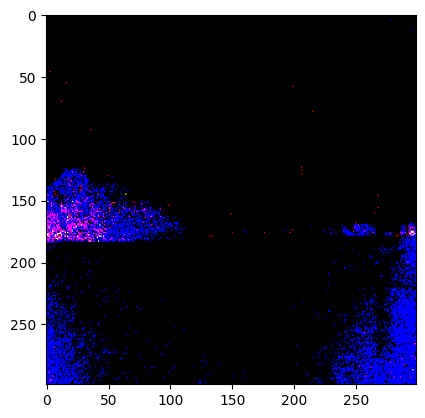

In [ ]:
plt.imshow(modified_r[0].astype(')

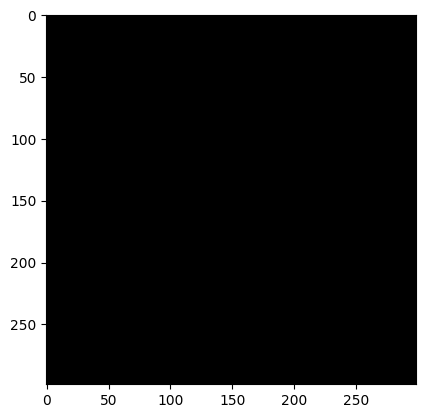

In [ ]:
plt.imshow(modified_r_2[0])

In [ ]:
# calculate frechet inception distance
def calculate_fid(model, images1, images2):
 # calculate activations
 act1 = model.predict(images1)
 act2 = model.predict(images2)
 # calculate mean and covariance statistics
 mu1, sigma1 = act1.mean(axis=0), cov(act1, rowvar=False)
 mu2, sigma2 = act2.mean(axis=0), cov(act2, rowvar=False)
 # calculate sum squared difference between means
 ssdiff = numpy.sum((mu1 - mu2)**2.0)
 # calculate sqrt of product between cov
 covmean = sqrtm(sigma1.dot(sigma2))
 # check and correct imaginary numbers from sqrt
 if iscomplexobj(covmean):
  covmean = covmean.real
 # calculate score
 fid = ssdiff + trace(sigma1) + trace(sigma2) - 2.0 * trace(covmean)
 return fid,act1,act2,sigma1,sigma2,covmean,ssdiff

In [ ]:
# prepare the inception v3 model
model = InceptionV3(include_top=False, pooling='avg', input_shape=(299,299,3), weights = 'imagenet', classifier_activation = None)
model.summary()

87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "inception_v3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 299, 299, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d (Conv2D)           │ (None, 149, 149, 32)   │            864 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization       │ (None, 149, 149, 32)   │             96 │ conv2d[0][0]           │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation (Activation)   │ (None, 149, 149, 32)   │              0 │ batch_normalization[0… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_1 (Conv2D)         │ (None, 147, 147, 32)   │          9,216 │ activation[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_1     │ (None, 147, 147, 32)   │             96 │ conv2d_1[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_1 (Activation) │ (None, 147, 147, 32)   │              0 │ batch_normalization_1… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_2 (Conv2D)         │ (None, 147, 147, 64)   │         18,432 │ activation_1[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_2     │ (None, 147, 147, 64)   │            192 │ conv2d_2[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_2 (Activation) │ (None, 147, 147, 64)   │              0 │ batch_normalization_2… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d             │ (None, 73, 73, 64)     │              0 │ activation_2[0][0]     │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_3 (Conv2D)         │ (None, 73, 73, 80)     │          5,120 │ max_pooling2d[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_3     │ (None, 73, 73, 80)     │            240 │ conv2d_3[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_3 (Activation) │ (None, 73, 73, 80)     │              0 │ batch_normalization_3… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_4 (Conv2D)         │ (None, 71, 71, 192)    │        138,240 │ activation_3[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_4     │ (None, 71, 71, 192)    │            576 │ conv2d_4[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_4 (Activat

 Total params: 21,802,784 (83.17 MB)

 Trainable params: 21,768,352 (83.04 MB)

 Non-trainable params: 34,432 (134.50 KB)

In [ ]:
# fid between images1 and images1
fid_s,act1_s,act2_s,sigma1_s,sigma2_s,covmean_s,ssdiff_s = calculate_fid(model, day_im, day_im)
print('FID (same) - Day and Day: %.3f' % ssdiff_s)

# mod_relighting
fid_d_uvcgan,act1_d,act2_d,sigma1_d,sigma2_d,covmean_d,ssdiff_d_uvcgan = calculate_fid(model, day_im, modified_r)
print('FID (same) - Modified Relighting: %.3f' % ssdiff_d_uvcgan)

# denoise
fid_d_fpncgan,act1_d,act2_d,sigma1_d,sigma2_d,covmean_d,ssdiff_d_fpncgan = calculate_fid(model, day_im, denoise)
print('FID (same) - Denoise: %.3f' % ssdiff_d_fpncgan)

# contrast
fid_d_vcgan,act1_d,act2_d,sigma1_d,sigma2_d,covmean_d,ssdiff_d_vcgan = calculate_fid(model, day_im, contrast)
print('FID (same) - Contrast: %.3f' % ssdiff_d_vcgan)

# sharpening
fid_d_uvcgan_edgeloss,act1_d,act2_d,sigma1_d,sigma2_d,covmean_d,ssdiff_d_uvcgan_edgeloss = calculate_fid(model, day_im, sharpening)
print('FID (same) - Sharpening: %.3f' % ssdiff_d_uvcgan_edgeloss)

# awb
fid_d_uvcgan_edgeloss,act1_d,act2_d,sigma1_d,sigma2_d,covmean_d,ssdiff_d_uvcgan_edgeloss = calculate_fid(model, day_im, awb)
print('FID (same) - AWB: %.3f' % ssdiff_d_uvcgan_edgeloss)

3/3 ━━━━━━━━━━━━━━━━━━━━ 24s 5s/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
FID (same) - Day and Day: 0.000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
FID (same) - Modified Relighting: 5.185
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
FID (same) - Denoise: 5.590
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
FID (same) - Contrast: 6.701
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
FID (same) - Sharpening: 7.657
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
FID (same) - AWB: 17.533


# SSIM for synthetic nighttime dataset

In [ ]:
#day
day_im = load_skip_raw_day(main_path,main_path_day,(299,299))
day_im = day_im/255.0

# mod relighting
image_name = 'Clean Synthetic Image (Without Raw Process).jpg'
modified_r = load_skip_raw(main_path,image_name,(299,299))
modified_r = modified_r/255.0

# denoise
image_name = 'Denoised Image.jpg'
denoise = load_skip_raw_glob(main_path,image_name,(299,299))
denoise = denoise/255.0

# contrast
image_name = 'After Contrast Conditional Enhance.jpg'
contrast = load_skip_raw_glob(main_path,image_name,(299,299))
contrast = contrast/255.0

# sharpening
image_name = 'Unsharp Masking.jpg'
sharpening = load_skip_raw_glob(main_path,image_name,(299,299))
sharpening = sharpening/255.0

# awb
image_name = 'Grayness Index.jpg'
awb = load_skip_raw_glob(main_path,image_name,(299,299))
awb = awb/255.0

In [ ]:
day = []
for day_real,night_gen in zip(day_im,day_im):
  im1 = color.rgb2gray(day_real)
  im2 = color.rgb2gray(night_gen)
  ssim_value = ssim(im1, im2, data_range=1)
  day.append(ssim_value)

ssim_modified_relighting = []
for day_real,night_gen in zip(day_im,modified_r):
  im1 = color.rgb2gray(day_real)
  im2 = color.rgb2gray(night_gen)
  ssim_value = ssim(im1, im2, data_range=1)
  ssim_modified_relighting.append(ssim_value)

ssim_denoise = []
for day_real,night_gen in zip(day_im,denoise):
  im1 = color.rgb2gray(day_real)
  im2 = color.rgb2gray(night_gen)
  ssim_value = ssim(im1, im2, data_range=1)
  ssim_denoise.append(ssim_value)

ssim_contrast = []
for day_real,night_gen in zip(day_im,contrast):
  im1 = color.rgb2gray(day_real)
  im2 = color.rgb2gray(night_gen)
  ssim_value = ssim(im1, im2, data_range=1)
  ssim_contrast.append(ssim_value)

ssim_sharpening = []
for day_real,night_gen in zip(day_im,sharpening):
  im1 = color.rgb2gray(day_real)
  im2 = color.rgb2gray(night_gen)
  ssim_value = ssim(im1, im2, data_range=1)
  ssim_sharpening.append(ssim_value)

ssim_awb = []
for day_real,night_gen in zip(day_im,awb):
  im1 = color.rgb2gray(day_real)
  im2 = color.rgb2gray(night_gen)
  ssim_value = ssim(im1, im2, data_range=1)
  ssim_awb.append(ssim_value)

print(f'Average SSIM DAY for {len(day)} images', sum(day)/len(day))
print(f'Average SSIM MODIFIED RELIGHTING for {len(day)} images', sum(ssim_modified_relighting)/len(ssim_modified_relighting))
print(f'Average SSIM DENOISING for {len(day)} images', sum(ssim_denoise)/len(ssim_denoise))
print(f'Average SSIM CONTRAST for {len(day)} images', sum(ssim_contrast)/len(ssim_contrast))
print(f'Average SSIM SHARPENING for {len(day)} images', sum(ssim_sharpening)/len(ssim_sharpening))
print(f'Average SSIM AWB for {len(day)} images', sum(ssim_awb)/len(ssim_awb))

Average SSIM DAY for 70 images 1.0
Average SSIM MODIFIED RELIGHTING for 70 images 0.405011063793918
Average SSIM DENOISING for 70 images 0.3684177150987555
Average SSIM CONTRAST for 70 images 0.5696718280228228
Average SSIM SHARPENING for 70 images 0.5573558373206189
Average SSIM AWB for 70 images 0.1876923195343818


# SSIM

In [ ]:
ssim_uvcgan = []
for day_real,night_gen in zip(day,night_generated_uvcgan):
  im1 = color.rgb2gray(day_real)
  im2 = color.rgb2gray(night_gen)
  ssim_value = ssim(im1, im2)
  ssim_uvcgan.append(ssim_value)

ssim_fpncgan = []
for day_real,night_gen in zip(day,night_generated_fpncgan):
  im1 = color.rgb2gray(day_real)
  im2 = color.rgb2gray(night_gen)
  ssim_value = ssim(im1, im2)
  ssim_fpncgan.append(ssim_value)

ssim_vcgan = []
for day_real,night_gen in zip(day,night_generated_vcgan):
  im1 = color.rgb2gray(day_real)
  im2 = color.rgb2gray(night_gen)
  ssim_value = ssim(im1, im2)
  ssim_vcgan.append(ssim_value)

ssim_uvcgan_edgeloss = []
for day_real,night_gen in zip(day,night_generated_uvcgan_edgeloss):
  im1 = color.rgb2gray(day_real)
  im2 = color.rgb2gray(night_gen)
  ssim_value = ssim(im1, im2)
  ssim_uvcgan_edgeloss.append(ssim_value)

print(f'Average SSIM UVCGAN for {len(day)} images', sum(ssim_uvcgan)/len(ssim_uvcgan)*100, '%')
print(f'Average SSIM FPNCGAN for {len(day)} images', sum(ssim_fpncgan)/len(ssim_fpncgan)*100, '%')
print(f'Average SSIM Vanilla CycleGANfor {len(day)} images', sum(ssim_vcgan)/len(ssim_vcgan)*100, '%')
print(f'Average SSIM UVCGAN EdgeLoss for {len(day)} images', sum(ssim_uvcgan_edgeloss)/len(ssim_uvcgan_edgeloss)*100, '%')

In [ ]:
# Compute the SSIM between the two images
sample = 30
im_day = color.rgb2gray(day[sample])

im_uvcgan = color.rgb2gray(night_generated_uvcgan[sample])
ssim_uvcgan = ssim(im_day, im_uvcgan)

im_fpncgan = color.rgb2gray(night_generated_fpncgan[sample])
ssim_fpncgan = ssim(im_day, im_fpncgan)

im_vcgan = color.rgb2gray(night_generated_vcgan[sample])
ssim_vcgan = ssim(im_day, im_vcgan)

im_uvcgan_edgeloss = color.rgb2gray(night_generated_uvcgan_edgeloss[sample])
ssim_uvcgan_edgeloss = ssim(im_day, im_uvcgan_edgeloss)

print("SSIM (UVCGAN):", ssim_uvcgan)
print("SSIM (FPNCGAN):", ssim_fpncgan)
print("SSIM (Vanilla CGAN):", ssim_vcgan)
print("SSIM (UVCGAN Edge Loss):", ssim_uvcgan_edgeloss)
print(' ')

plt.figure(figsize = [14,10])

plt.subplot(3,2,1)
plt.imshow(day[sample])
plt.title('Real')
plt.axis('off')

plt.subplot(3,2,2)
plt.imshow(night_generated_uvcgan[sample])
plt.title('Generated UVCGAN')
plt.axis('off')

plt.subplot(3,2,3)
plt.imshow(night_generated_fpncgan[sample])
plt.title('Generated FPNCGAN')
plt.axis('off')

plt.subplot(3,2,4)
plt.imshow(night_generated_vcgan[sample])
plt.title('Generated Vanilla CycleGAN')
plt.axis('off')

plt.subplot(3,2,5)
plt.imshow(night_generated_uvcgan_edgeloss[sample])
plt.title('Generated UVCGAN w Edge Loss')
plt.axis('off')

# DUMPS

In [ ]:
# prepare the inception v3 model
model_a = InceptionV3(include_top=False, pooling='avg', input_shape=(299,299,3))
# define two fake collections of images
images1 = randint(0, 255, 10*32*32*3)
images1 = images1.reshape((10,32,32,3))
images2 = randint(0, 255, 10*32*32*3)
images2 = images2.reshape((10,32,32,3))
print('Prepared', images1.shape, images2.shape)
# convert integer to floating point values
images1 = images1.astype('float32')
images2 = images2.astype('float32')
# resize images
images1 = scale_images(images1, (299,299,3))
images2 = scale_images(images2, (299,299,3))
print('Scaled', images1.shape, images2.shape)
# pre-process images
images1 = preprocess_input(images1)
images2 = preprocess_input(images2)
# fid between images1 and images1
fid_s,act1_s,act2_s,sigma1_s,sigma2_s,covmean_s,ssdiff_s = calculate_fid(model_a, images1, images1)
print('FID (same): %.3f' % fid_s)
# fid between images1 and images2
fid_d,act1_d,act2_d,sigma1_d,sigma2_d,covmean_d,ssdiff_d = calculate_fid(model_a, images1, images2)
print('FID (different): %.3f' % fid_d)

In [ ]:
ssdiff_d

In [ ]:
ssdiff_s

In [ ]:
def ssim(img1, img2):
    C1 = (0.01 * 255)**2
    C2 = (0.03 * 255)**2

    img1 = img1.astype(np.float64)
    img2 = img2.astype(np.float64)
    kernel = cv2.getGaussianKernel(11, 1.5)
    window = np.outer(kernel, kernel.transpose())

    mu1 = cv2.filter2D(img1, -1, window)[5:-5, 5:-5]  # valid
    mu2 = cv2.filter2D(img2, -1, window)[5:-5, 5:-5]
    mu1_sq = mu1**2
    mu2_sq = mu2**2
    mu1_mu2 = mu1 * mu2
    sigma1_sq = cv2.filter2D(img1**2, -1, window)[5:-5, 5:-5] - mu1_sq
    sigma2_sq = cv2.filter2D(img2**2, -1, window)[5:-5, 5:-5] - mu2_sq
    sigma12 = cv2.filter2D(img1 * img2, -1, window)[5:-5, 5:-5] - mu1_mu2

    ssim_map = ((2 * mu1_mu2 + C1) * (2 * sigma12 + C2)) / ((mu1_sq + mu2_sq + C1) *
                                                            (sigma1_sq + sigma2_sq + C2))
    return ssim_map.mean()


def calculate_ssim(img1, img2):
    '''calculate SSIM
    the same outputs as MATLAB's
    img1, img2: [0, 255]
    '''
    if not img1.shape == img2.shape:
        raise ValueError('Input images must have the same dimensions.')
    if img1.ndim == 2:
        return ssim(img1, img2)
    elif img1.ndim == 3:
        if img1.shape[2] == 3:
            ssims = []
            for i in range(3):
                ssims.append(ssim(img1, img2))
            return np.array(ssims).mean()
        elif img1.shape[2] == 1:
            return ssim(np.squeeze(img1), np.squeeze(img2))
    else:
        raise ValueError('Wrong input image dimensions.')

calculate_ssim(day_unnorm[0], night_generated_unnorm[99])